In [2]:
conda install scipy

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.8.30          |  py310h06a4308_0         162 KB
    scipy-1.13.1               |  py310heeff2f4_0        22.1 MB
    ------------------------------------------------------------
                                           Total:        22.3 MB

The following NEW packages will be INSTALLED:

  pybind11-abi       pkgs/main/noarch::pybind11-abi-4-hd3eb1b0_1 

The following packages will be UPDATED:

  ca-certificates                      2024.3.11-h06a4308_0 --> 2024.9.24-h06a4308_0 
  certifi                          2024.2.2-py310h06a4308_0 --> 2024.8.30-py310h06a4308_0 
  scipy                       

Archivo descargado exitosamente
dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])
          1         2         3         4         5        6         7    \
1    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
2    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
3    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
5    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
634  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
635  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
636  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
637  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
638  0.101124  0.069231  0.000000  0.000000 

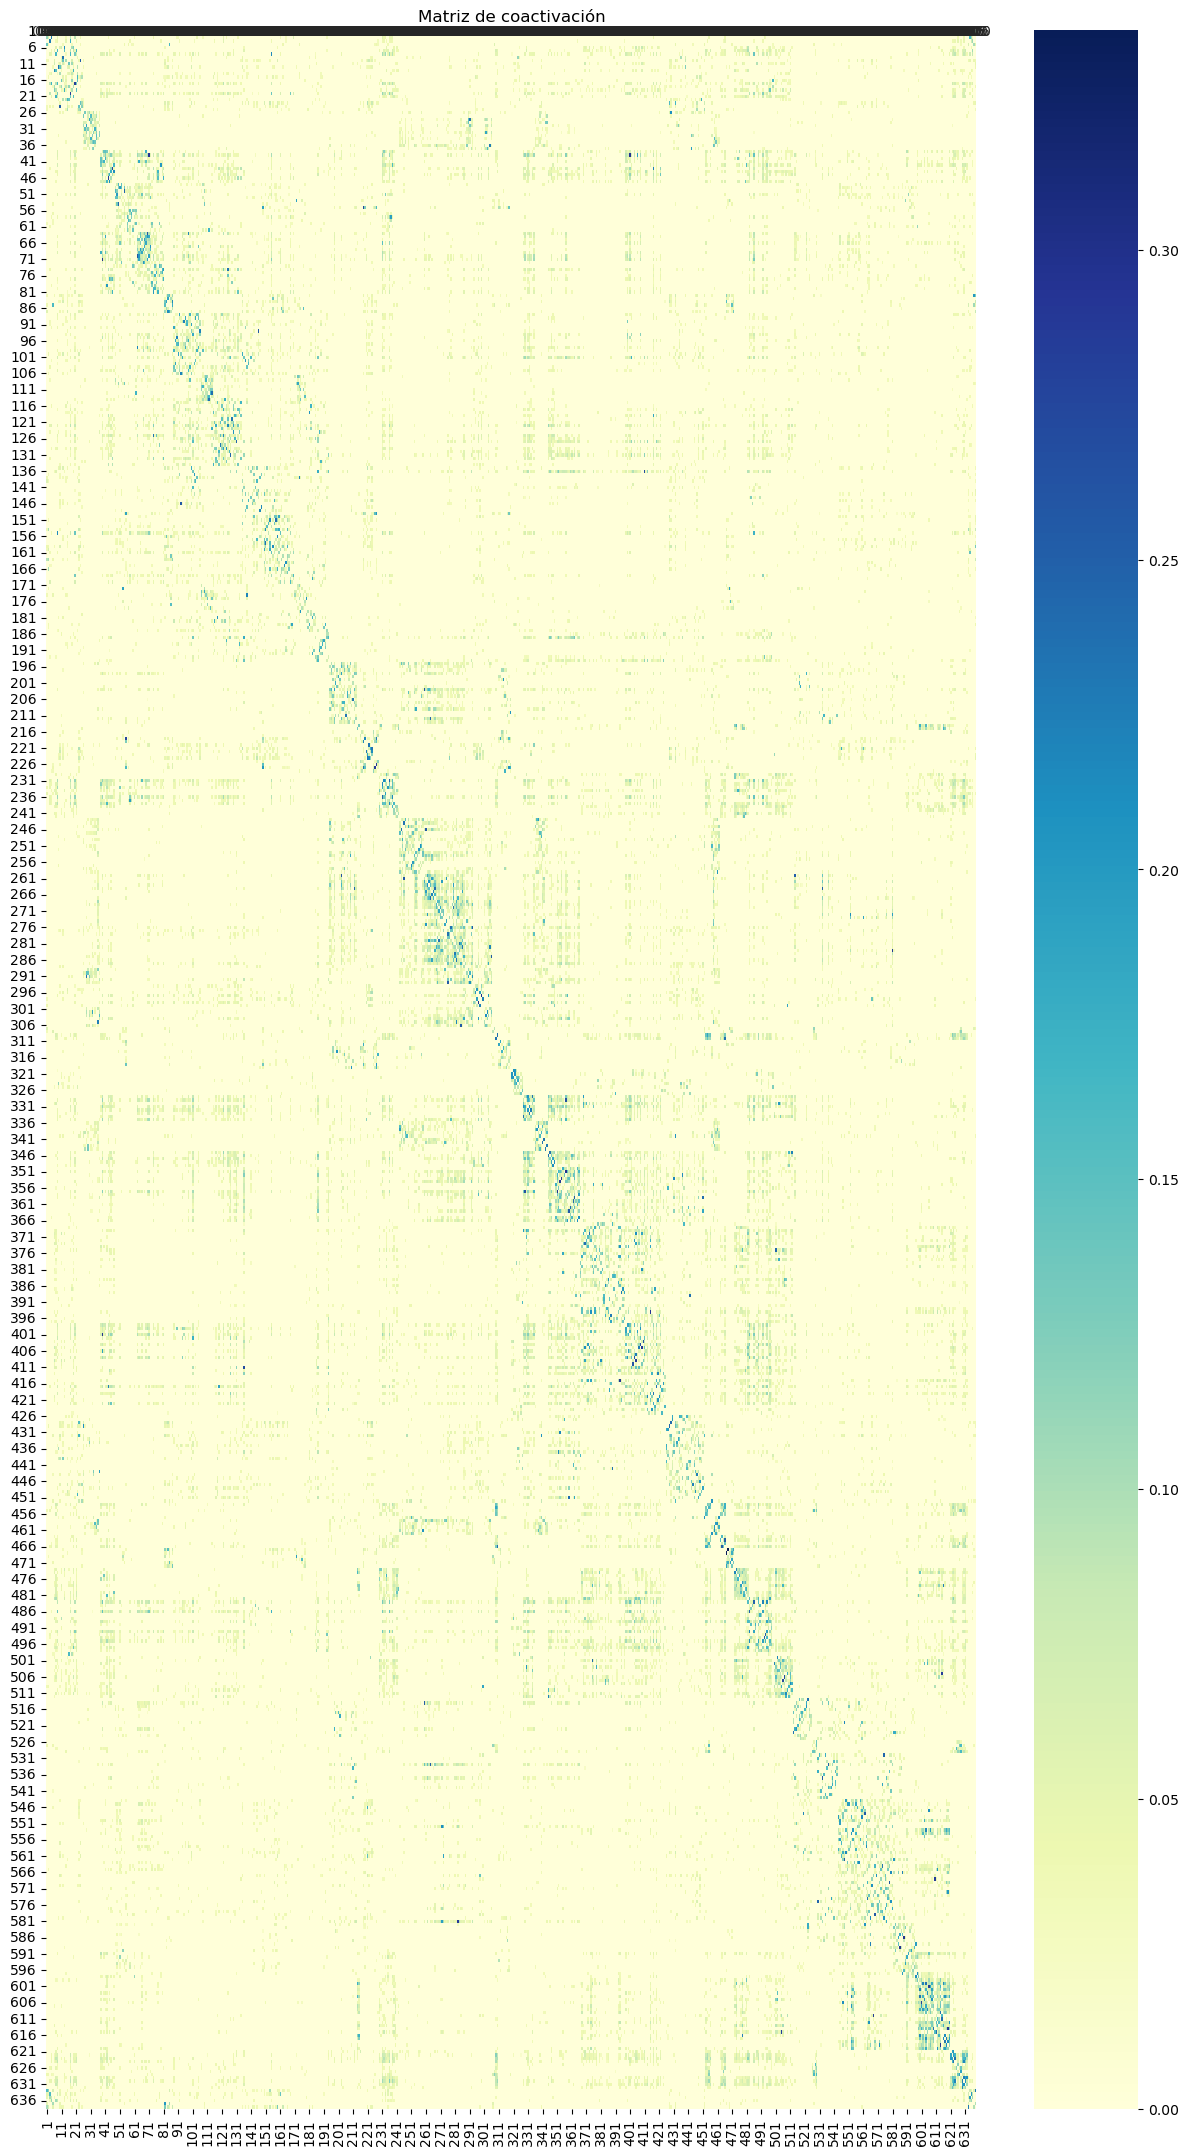

In [26]:
import requests
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Proceso que saqué de google para cargar mi archivo por que no tengo licencia de pycharm
# Cargar archivo directamente de github a jupyter

# Versión de Github
url = 'https://raw.githubusercontent.com/Vaniat25/Neurociencias-2025-1/main/Coactivation_matrix.mat'

# Para descargar mi archivo
response = requests.get(url)

# Para guardar en mi disco local
with open('Coactivation_matrix.mat', 'wb') as file:
    file.write(response.content)

print("Archivo descargado exitosamente")

mat_data = scipy.io.loadmat('Coactivation_matrix.mat')

print(mat_data.keys())

coactivation_matrix = mat_data['Coactivation_matrix']

df = pd.DataFrame(coactivation_matrix)

df.columns = range(1, df.shape[1] + 1)

df.index = df.columns

print(df)

plt.figure(figsize=(15, 27))

sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)

plt.title('Matriz de coactivación')

plt.show()

In [4]:
subset_df = df.iloc[9:30, 9:30]
print(subset_df)

          10        11        12        13        14        15        16  \
10  0.000000  0.054299  0.145251  0.000000  0.103286  0.000000  0.000000   
11  0.054299  0.000000  0.075000  0.035556  0.000000  0.000000  0.140940   
12  0.145251  0.075000  0.000000  0.000000  0.000000  0.053435  0.059701   
13  0.000000  0.035556  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.103286  0.000000  0.000000  0.000000  0.000000  0.043478  0.055215   
15  0.000000  0.000000  0.053435  0.000000  0.043478  0.000000  0.000000   
16  0.000000  0.140940  0.059701  0.000000  0.055215  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.036697  0.034398  0.000000  0.000000   
18  0.068627  0.107784  0.000000  0.033175  0.087209  0.034247  0.115108   
19  0.000000  0.046414  0.032864  0.170833  0.037344  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000

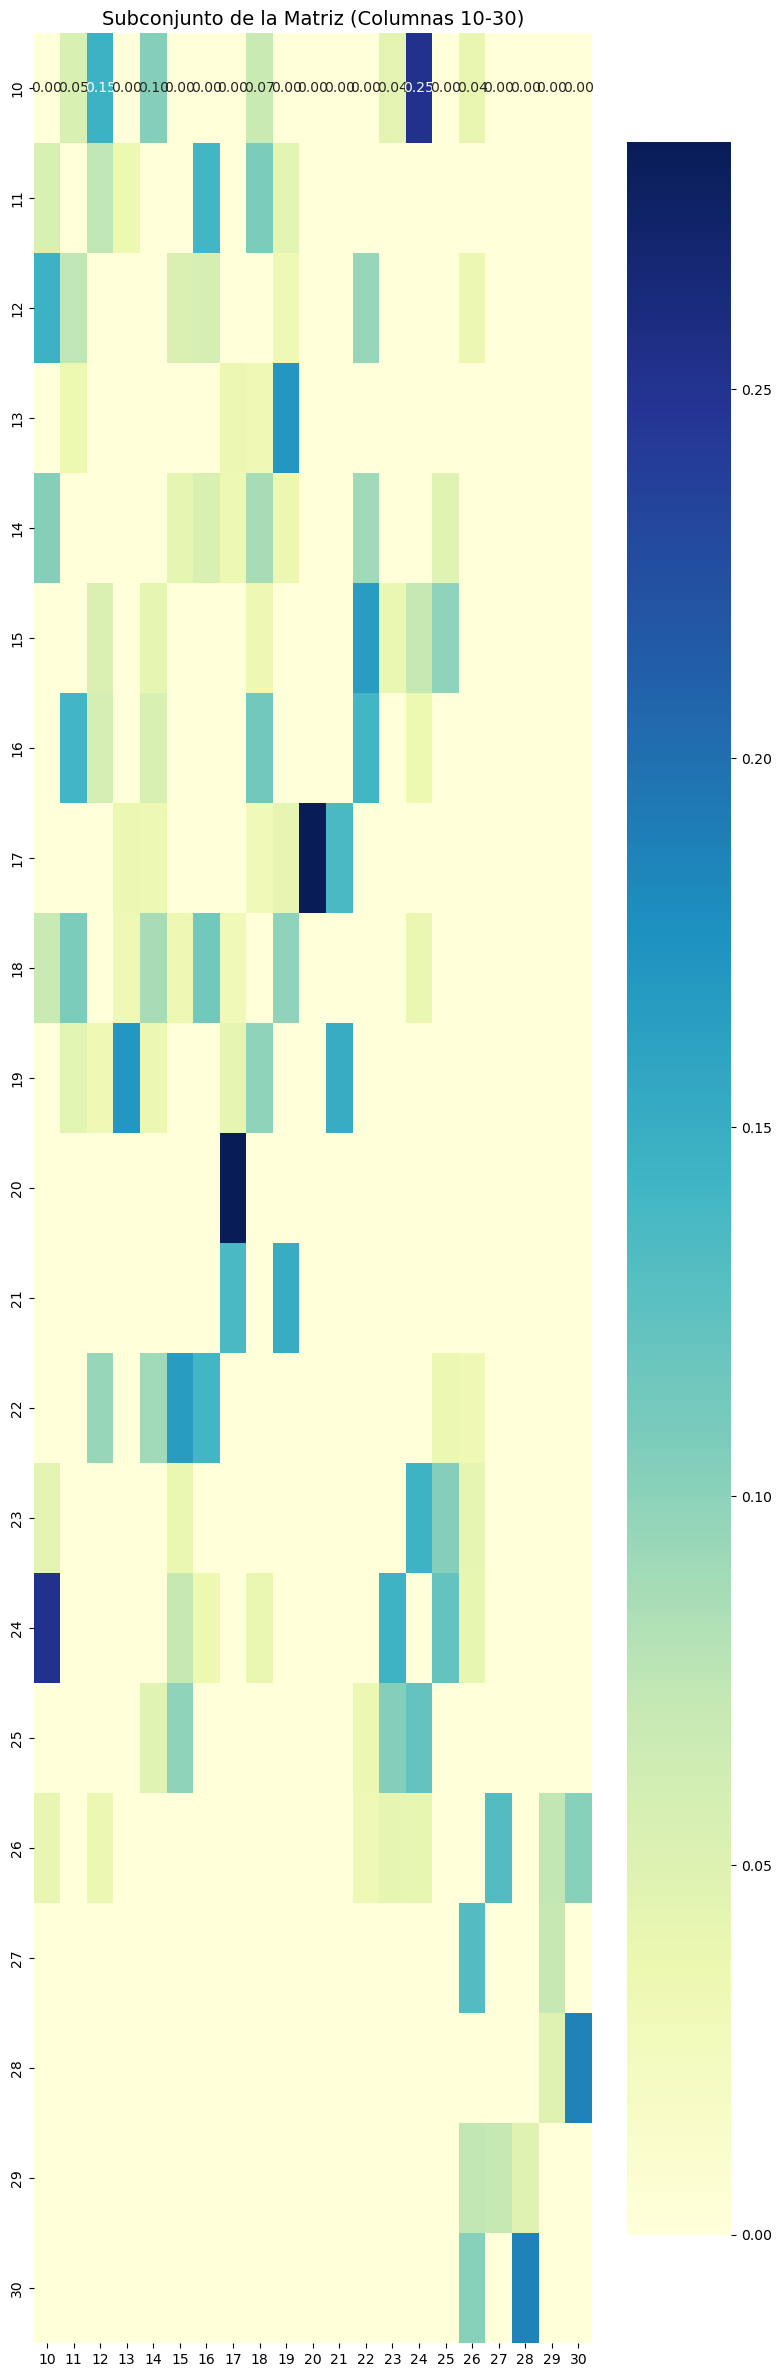

In [6]:
plt.figure(figsize=(9, 30))
sns.heatmap(subset_df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Subconjunto de la Matriz (Columnas 10-30)', fontsize=14)
plt.show()

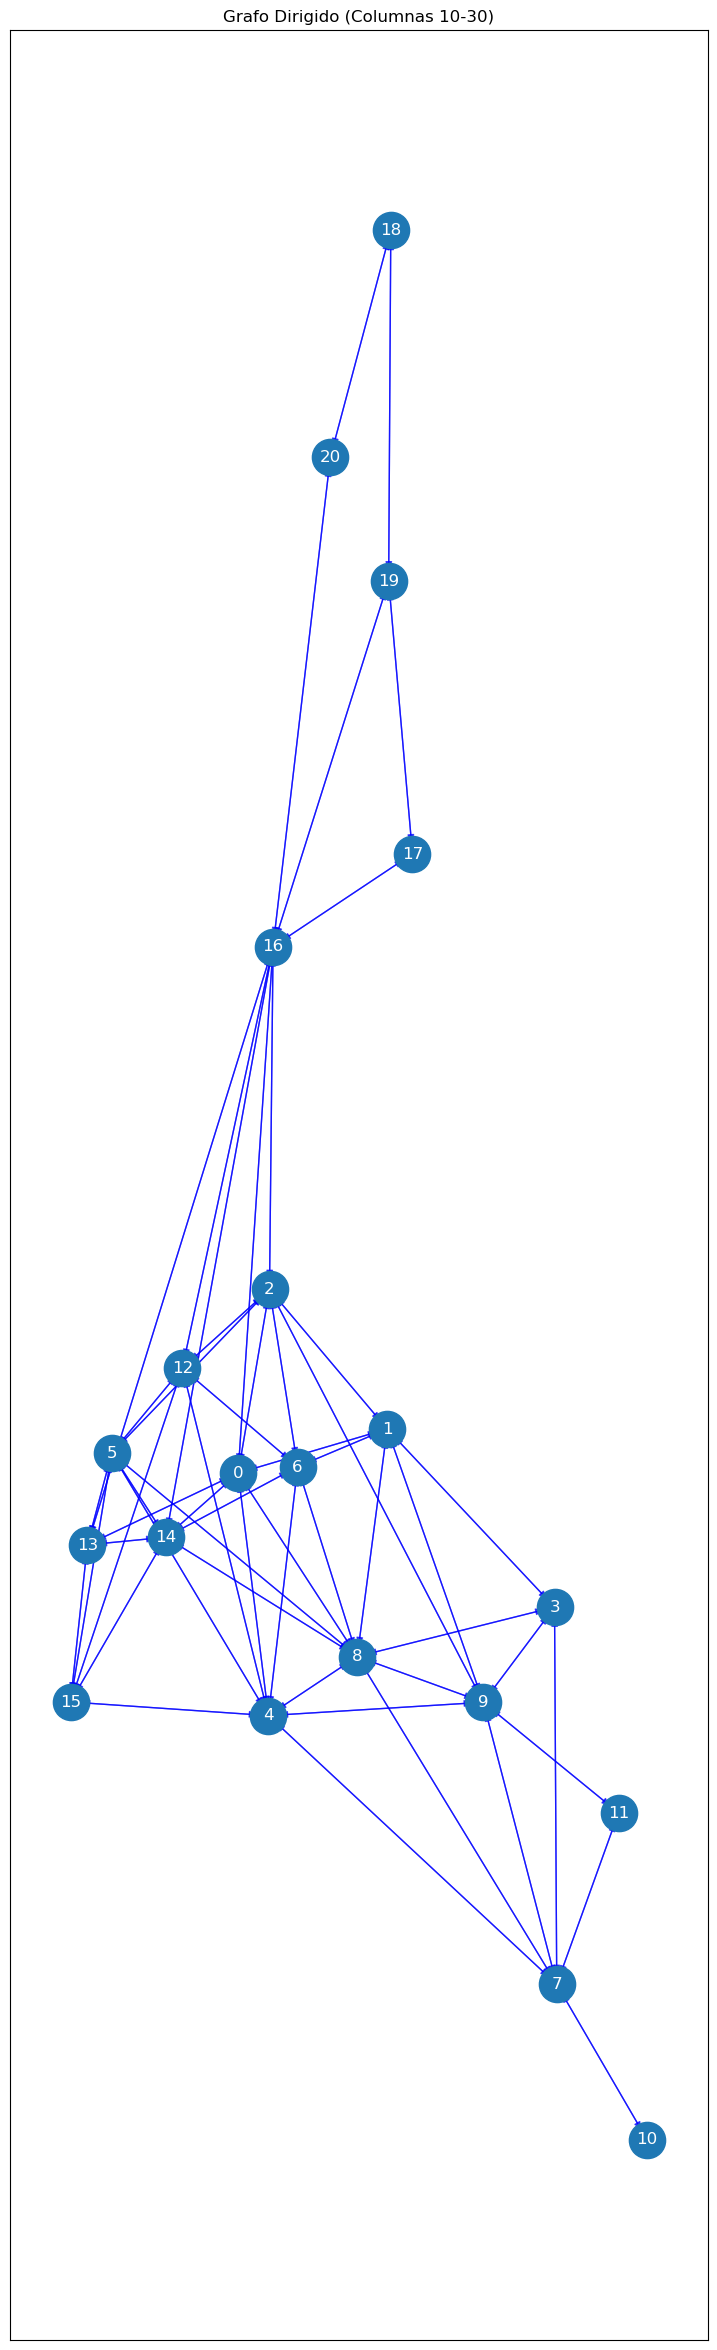

In [16]:
G = nx.DiGraph()
nodes = range(subset_df.shape[0])
G.add_nodes_from(nodes)
for i in range(subset_df.shape[0]):
    for j in range(subset_df.shape[1]):
        if subset_df.iloc[i, j] != 0:
            G.add_edge(i, j, weight=subset_df.iloc[i, j])

plt.figure(figsize=(9, 30))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=680)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7, edge_color='b', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')
plt.title('Grafo Dirigido (Columnas 10-30)')
plt.show()

In [20]:
out_degree = dict(G.out_degree())
max_node = max(out_degree, key=out_degree.get)
print(f"Nodo que contiene mayor número de conexiones es el: {max_node} con {out_degree[max_node]} conexiones.")

Nodo que contiene mayor número de conexiones es el: 8 con 9 conexiones.


In [22]:
flattened_values = df.values.flatten()
q_25 = pd.Series(flattened_values).quantile(0.25)
q_50 = pd.Series(flattened_values).quantile(0.50)
q_75 = pd.Series(flattened_values).quantile(0.75)

print(f"Quantil 0.25: {q_25}")
print(f"Quantil 0.50: {q_50}")
print(f"Quantil 0.75: {q_75}")

Quantil 0.25: 0.0
Quantil 0.50: 0.0
Quantil 0.75: 0.0


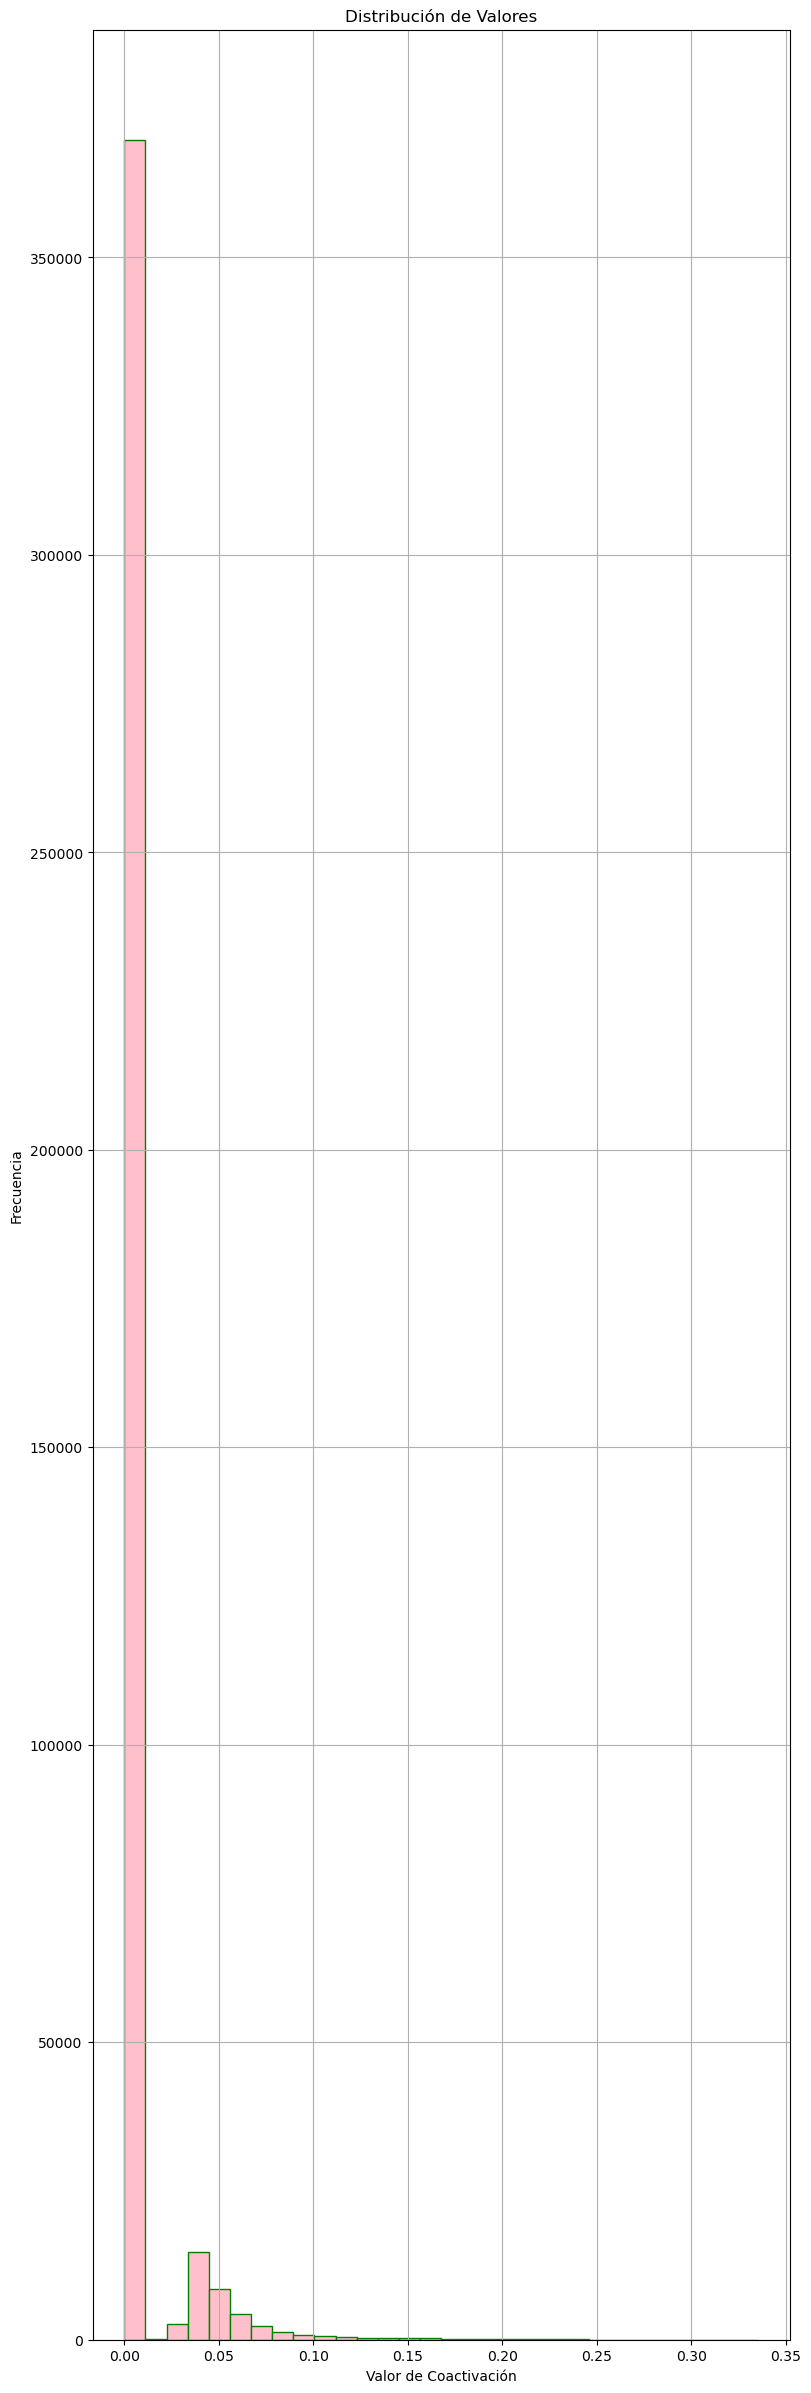

In [36]:
plt.figure(figsize=(9, 30))
plt.hist(flattened_values, bins=30, color='pink', edgecolor='green')
plt.title('Distribución de Valores')
plt.xlabel('Valor de Coactivación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [41]:
subset_df = df.iloc[9:30, 9:30]
binary_df = subset_df.applymap(lambda x: 1 if x > 0 else 0)
print(binary_df)

    10  11  12  13  14  15  16  17  18  19  ...  21  22  23  24  25  26  27  \
10   0   1   1   0   1   0   0   0   1   0  ...   0   0   1   1   0   1   0   
11   1   0   1   1   0   0   1   0   1   1  ...   0   0   0   0   0   0   0   
12   1   1   0   0   0   1   1   0   0   1  ...   0   1   0   0   0   1   0   
13   0   1   0   0   0   0   0   1   1   1  ...   0   0   0   0   0   0   0   
14   1   0   0   0   0   1   1   1   1   1  ...   0   1   0   0   1   0   0   
15   0   0   1   0   1   0   0   0   1   0  ...   0   1   1   1   1   0   0   
16   0   1   1   0   1   0   0   0   1   0  ...   0   1   0   1   0   0   0   
17   0   0   0   1   1   0   0   0   1   1  ...   1   0   0   0   0   0   0   
18   1   1   0   1   1   1   1   1   0   1  ...   0   0   0   1   0   0   0   
19   0   1   1   1   1   0   0   1   1   0  ...   1   0   0   0   0   0   0   
20   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   0   
21   0   0   0   0   0   0   0   1   0   1  ...   0 

/tmp/ipykernel_596/1324943149.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_df = subset_df.applymap(lambda x: 1 if x > 0 else 0)
